>[Випадкові процеси та їх застосування в аналізі даних](#scrollTo=jlG03TFH0Pfl)

>>>[Ланцюги Маркова](#scrollTo=Ka9FHbm1pX_7)

>>>>[Матриця переходів](#scrollTo=QQEHZYs0AfcP)

>>[Ланцюги Маркова в обробці природної мови (Natural Language Processing, NLP)](#scrollTo=tRr08hHao6iS)

>>>[Алгоритм ланцюга Маркова для генерації речень](#scrollTo=FtBYSPuP7Mai)

>>>>[simple](#scrollTo=TpCYzOWmsn1j)

>>>>[more complex](#scrollTo=5CpMLsb5srOB)

>>>[Марковські процеси ухвалення рішень (Markov decision process, MDP)](#scrollTo=RBFEDlnj7LWa)

>>>[Елементи марковських процесів ухвалення рішень](#scrollTo=Jnbvhhpb7Jpa)

>>[Рівняння Беллмана та оптимальність](#scrollTo=BZuS4SrD7I8Z)

>>>[Розв'язання рівняння Беллмана](#scrollTo=lanldjn1-3BT)

>>>>[Визначення параметрів:](#scrollTo=_Ct7KRFt-6L6)

>>>>[Ініціалізація функції вартості:](#scrollTo=i6JibNQ6m-lM)

>>>>[Покрокове оновлення функції вартості:](#scrollTo=KCU_nJ9am462)

>>>>[Пошук оптимальної стратегії](#scrollTo=GkMGMpVTmx4X)

>>[Задачі про замерзле озеро](#scrollTo=jzdVl-lU-1Ie)

>>>>[2](#scrollTo=Hn35GcVL5y3U)

>[Додаткові матеріали](#scrollTo=_UhpeyIRZTYa)



# Випадкові процеси та їх застосування в аналізі даних




### Ланцюги Маркова

In [ ]:
import numpy as np

class MarkovChain(object):
    def __init__(self, transition_prob):
        """
        Initialize the MarkovChain instance.

        Parameters
        ----------
        transition_prob: dict
            A dict object representing the transition
            probabilities in Markov Chain.
            Should be of the form:
                {'state1': {'state1': 0.1, 'state2': 0.4},
                 'state2': {...}}
        """
        self.transition_prob = transition_prob
        self.states = list(transition_prob.keys())

    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time
        instance.

        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
            self.states,
            p=[self.transition_prob[current_state][next_state]
               for next_state in self.states]
        )

    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.

        Parameters
        ----------
        current_state: str
            The state of the current random variable.

        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

In [ ]:
transition_prob = {'Sunny': {'Sunny': 0.8, 'Rainy': 0.19,
 'Snowy': 0.01},
 'Rainy': {'Sunny': 0.2, 'Rainy': 0.7,
 'Snowy': 0.1},
 'Snowy': {'Sunny': 0.1, 'Rainy': 0.2,
 'Snowy': 0.7}}

In [ ]:
weather_chain = MarkovChain(transition_prob=transition_prob)
weather_chain.states

['Sunny', 'Rainy', 'Snowy']

In [ ]:
weather_chain.next_state(current_state='Sunny')

'Sunny'

In [ ]:
weather_chain.next_state(current_state='Snowy')

'Snowy'

In [ ]:
weather_chain.generate_states(current_state='Snowy', no=10)

0 : 10
1 : 10
2 : 10
3 : 10
4 : 10
5 : 10
6 : 10
7 : 10
8 : 10
9 : 10


['Snowy',
 'Snowy',
 'Rainy',
 'Rainy',
 'Rainy',
 'Rainy',
 'Sunny',
 'Sunny',
 'Rainy',
 'Rainy']

#### Матриця переходів


In [ ]:
import numpy as np

class MarkovChain(object):
    def __init__(self, transition_matrix, states):
        """
        Initialize the MarkovChain instance.

        Parameters
        ----------
        transition_matrix: 2-D array
            A 2-D array representing the probabilities of change of
            state in the Markov Chain.

        states: 1-D array
            An array representing the states of the Markov Chain. It
            needs to be in the same order as transition_matrix.
        """
        self.transition_matrix = np.atleast_2d(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in
                           range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in
                           range(len(self.states))}

    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time
        instance.

        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
         self.states,
         p=self.transition_matrix[self.index_dict[current_state], :]
        )

    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.

        Parameters
        ----------
        current_state: str
            The state of the current random variable.

        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states


In [ ]:
transition_matrix = [[0.7, 0.2, 0.1],
                         [0.2,  0.7,  0.1],
                         [0.1,  0.2,  0.7]]

In [ ]:
weather_chain = MarkovChain(transition_matrix=transition_matrix,
                                states=['Sunny', 'Rainy', 'Snowy'])

In [ ]:
weather_chain.next_state(current_state='Sunny')

'Sunny'

In [ ]:
weather_chain.next_state(current_state='Snowy')

'Rainy'

In [ ]:
weather_chain.generate_states(current_state='Snowy', no=10)

['Rainy',
 'Rainy',
 'Rainy',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Rainy']

## Ланцюги Маркова в обробці природної мови (Natural Language Processing, NLP)



### Алгоритм ланцюга Маркова для генерації речень


#### simple

In [ ]:
import numpy as np

# Список можливих станів (символів)
states = ['h', 'e', 'l', 'o', ' ', 'w', 'r', 'd']

# Матриця переходів між станами (ймовірності переходів)
transition_matrix = np.array([
    [0, 0.2, 0.4, 0.2, 0.2, 0, 0, 0],
    [0.2, 0, 0.2, 0.2, 0.2, 0.2, 0, 0],
    [0, 0.2, 0, 0.2, 0.2, 0.2, 0.2, 0],
    [0, 0, 0.2, 0, 0.2, 0.2, 0.2, 0.2],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3],
    [0, 0, 0, 0, 0.2, 0, 0.8, 0],
    [0, 0, 0, 0, 0, 0.4, 0, 0.6],
    [0, 0, 0, 0, 0, 0, 0, 1]
])

# Початковий стан
initial_state = ' '

# Генерація фрази
current_state = initial_state
generated_phrase = [current_state]
num_steps = 20

for _ in range(num_steps):
    next_state = np.random.choice(states, p=transition_matrix[states.index(current_state)])
    generated_phrase.append(next_state)
    current_state = next_state

# Об'єднати сгенеровану фразу в одну рядок
generated_phrase = ''.join(generated_phrase)

# Вивести результат
print(generated_phrase)

 dddddddddddddddddddd


In [ ]:
import random

# Зразок корпусу тексту
corpus = """
Твої очі, як те море
Супокійне, світляне;
Серця мого давнє горе,
Мов пилинка, в них тоне.

Твої очі, мов криниця
Чиста на перловім дні,
А надія, мов зірниця,
З них проблискує мені.

Одну я любив за веселість,
Другу я за вроду кохав,
А третій за соняшний усміх
Квітками дорогу встилав.

Ти зовсім була не вродлива
І завжди, як вечір, смутна…
Чого ж ти з усіх моїх милих
У серці осталась одна?!.
"""

# Побудова моделі Ланцюга Маркова
def build_markov_model(corpus):
    words = corpus.split()
    model = {}
    for i in range(len(words)-1):
        if words[i] not in model:
            model[words[i]] = []
        model[words[i]].append(words[i+1])
    return model

# Генерація тексту на основі моделі Ланцюга Маркова
def generate_text(model, length=10):
    current_word = random.choice(list(model.keys()))
    text = current_word
    for _ in range(length-1):
        if current_word in model:
            next_word = random.choice(model[current_word])
            text += " " + next_word
            current_word = next_word
        else:
            break
    return text

# Побудова моделі
model = build_markov_model(corpus)

# Генерація нового тексту
new_text = generate_text(model, length=10)
print(new_text)


перловім дні, А надія, мов криниця Чиста на перловім дні,


#### more complex

In [ ]:
!wget -O data.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/sherlock.zip?raw=true

--2024-08-20 23:25:44--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/sherlock.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/main/sherlock.zip [following]
--2024-08-20 23:25:44--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/main/sherlock.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/main/sherlock.zip [following]
--2024-08-20 23:25:45--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/main/sherlock.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent

In [ ]:
!unzip data.zip -d data

Archive:  data.zip
  inflating: data/sherlock/3gab.txt  
  inflating: data/sherlock/3gar.txt  
  inflating: data/sherlock/3stu.txt  
  inflating: data/sherlock/abbe.txt  
  inflating: data/sherlock/advs.txt  
  inflating: data/sherlock/bery.txt  
  inflating: data/sherlock/blac.txt  
  inflating: data/sherlock/blan.txt  
  inflating: data/sherlock/blue.txt  
  inflating: data/sherlock/bosc.txt  
  inflating: data/sherlock/bruc.txt  
  inflating: data/sherlock/cano.txt  
  inflating: data/sherlock/card.txt  
  inflating: data/sherlock/case.txt  
  inflating: data/sherlock/chas.txt  
  inflating: data/sherlock/cnus.txt  
  inflating: data/sherlock/copp.txt  
  inflating: data/sherlock/cree.txt  
  inflating: data/sherlock/croo.txt  
  inflating: data/sherlock/danc.txt  
  inflating: data/sherlock/devi.txt  
  inflating: data/sherlock/dyin.txt  
  inflating: data/sherlock/empt.txt  
  inflating: data/sherlock/engr.txt  
  inflating: data/sherlock/fina.txt  
  inflating: data/sherlock/five

In [ ]:
import numpy as np
import pandas as pd
import os
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<module 'nltk.tokenize.punkt' from '/usr/local/lib/python3.10/dist-packages/nltk/tokenize/punkt.py'>

In [ ]:
story_path = "./data/sherlock/sherlock/"

def read_all_stories(story_path):
    txt = []
    for _, _, files in os.walk(story_path):
        for file in files:
            with open(story_path+file) as f:
                for line in f:
                    line = line.strip()
                    if line=='----------': break
                    if line!='':txt.append(line)
    return txt

stories = read_all_stories(story_path)
print("number of lines = ", len(stories))

number of lines =  215021


Очищення та підготовка даних

In [ ]:
print(stories[:10])

['THE RESIDENT PATIENT', 'Arthur Conan Doyle', 'Glancing over the somewhat incoherent series of Memoirs with which I', 'have endeavored to illustrate a few of the mental peculiarities of my', 'friend Mr. Sherlock Holmes, I have been struck by the difficulty', 'which I have experienced in picking out examples which shall in every', 'way answer my purpose. For in those cases in which Holmes has', 'performed some tour de force of analytical reasoning, and has', 'demonstrated the value of his peculiar methods of investigation, the', 'facts themselves have often been so slight or so commonplace that I']


In [ ]:
def clean_txt(txt):
    cleaned_txt = []
    for line in txt:
        line = line.lower()
        line = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-\\]", "", line)
        tokens = word_tokenize(line)
        words = [word for word in tokens if word.isalpha()]
        cleaned_txt+=words
    return cleaned_txt

cleaned_stories = clean_txt(stories)
print("number of words = ", len(cleaned_stories))


number of words =  2332247
['the', 'resident', 'patient', 'arthur', 'conan', 'doyle', 'glancing', 'over', 'the', 'somewhat', 'incoherent', 'series', 'of', 'memoirs', 'with', 'which', 'i', 'have', 'endeavored', 'to', 'illustrate', 'a', 'few', 'of', 'the', 'mental', 'peculiarities', 'of', 'my', 'friend', 'mr', 'sherlock', 'holmes', 'i', 'have', 'been', 'struck', 'by', 'the', 'difficulty', 'which', 'i', 'have', 'experienced', 'in', 'picking', 'out', 'examples', 'which', 'shall', 'in', 'every', 'way', 'answer', 'my', 'purpose', 'for', 'in', 'those', 'cases', 'in', 'which', 'holmes', 'has', 'performed', 'some', 'tour', 'de', 'force', 'of', 'analytical', 'reasoning', 'and', 'has', 'demonstrated', 'the', 'value', 'of', 'his', 'peculiar', 'methods', 'of', 'investigation', 'the', 'facts', 'themselves', 'have', 'often', 'been', 'so', 'slight', 'or', 'so', 'commonplace', 'that', 'i', 'could', 'not', 'feel', 'justified']


In [ ]:
print(cleaned_stories[:100])

['the', 'resident', 'patient', 'arthur', 'conan', 'doyle', 'glancing', 'over', 'the', 'somewhat', 'incoherent', 'series', 'of', 'memoirs', 'with', 'which', 'i', 'have', 'endeavored', 'to', 'illustrate', 'a', 'few', 'of', 'the', 'mental', 'peculiarities', 'of', 'my', 'friend', 'mr', 'sherlock', 'holmes', 'i', 'have', 'been', 'struck', 'by', 'the', 'difficulty', 'which', 'i', 'have', 'experienced', 'in', 'picking', 'out', 'examples', 'which', 'shall', 'in', 'every', 'way', 'answer', 'my', 'purpose', 'for', 'in', 'those', 'cases', 'in', 'which', 'holmes', 'has', 'performed', 'some', 'tour', 'de', 'force', 'of', 'analytical', 'reasoning', 'and', 'has', 'demonstrated', 'the', 'value', 'of', 'his', 'peculiar', 'methods', 'of', 'investigation', 'the', 'facts', 'themselves', 'have', 'often', 'been', 'so', 'slight', 'or', 'so', 'commonplace', 'that', 'i', 'could', 'not', 'feel', 'justified']


In [ ]:
def make_markov_model(cleaned_stories, n_gram=2):
    markov_model = {}
    for i in range(len(cleaned_stories)-n_gram-1):
        curr_state, next_state = "", ""
        for j in range(n_gram):
            curr_state += cleaned_stories[i+j] + " "
            next_state += cleaned_stories[i+j+n_gram] + " "
        curr_state = curr_state[:-1]
        next_state = next_state[:-1]
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1

    # calculating transition probabilities
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total

    return markov_model

In [ ]:
markov_model = make_markov_model(cleaned_stories)

In [ ]:
print("number of states = ", len(markov_model.keys()))

number of states =  208718


In [ ]:
print("All possible transitions from 'the game' state: \n")
print(markov_model['the game'])

All possible transitions from 'the game' state: 

{'was in': 0.02702702702702703, 'is hardly': 0.02702702702702703, 'would have': 0.036036036036036036, 'is up': 0.06306306306306306, 'is and': 0.036036036036036036, 'in their': 0.036036036036036036, 'was whist': 0.036036036036036036, 'was up': 0.09009009009009009, 'in that': 0.036036036036036036, 'the lack': 0.036036036036036036, 'for all': 0.06306306306306306, 'is afoot': 0.036036036036036036, 'may wander': 0.02702702702702703, 'now a': 0.02702702702702703, 'my own': 0.02702702702702703, 'at any': 0.02702702702702703, 'mr holmes': 0.02702702702702703, 'ay whats': 0.02702702702702703, 'my friend': 0.02702702702702703, 'fairly by': 0.02702702702702703, 'is not': 0.02702702702702703, 'was not': 0.02702702702702703, 'was afoot': 0.036036036036036036, 'for the': 0.036036036036036036, 'worth it': 0.02702702702702703, 'you are': 0.02702702702702703, 'i am': 0.02702702702702703, 'now count': 0.02702702702702703, 'your letter': 0.027027027027027

Generating Sherlock Holmes stories!

In [ ]:
def generate_story(markov_model, limit=100, start='my god'):
    n = 0
    curr_state = start
    next_state = None
    story = ""
    story+=curr_state+" "
    while n<limit:
        next_state = random.choices(list(markov_model[curr_state].keys()),
                                    list(markov_model[curr_state].values()))

        curr_state = next_state[0]
        story+=curr_state+" "
        n+=1
    return story

In [ ]:
 for i in range(20):
    print(str(i)+". ", generate_story(markov_model, start="dear holmes", limit=8))

0.  dear holmes i thought nothing of this excuse me i had gone hes our leading man about here 
1.  dear holmes i fear but you must look upon you and that they had been disturbed nor were 
2.  dear holmes if i am not aware that the old house and in the cab the figure against 
3.  dear holmes he has himself said holmes firmly she hesitated then she called a halt and watered their 
4.  dear holmes am i to do now it burst upon our ears until it was too much concerned 
5.  dear holmes i fear that there is hardly a government messenger had brought it over to america with 
6.  dear holmes that i guess we had best have your friends here not only the lamentable death of 
7.  dear holmes oh yes there are nearly always some there and covered over her temples on each side 
8.  dear holmes oh yes you have done your skill has indeed exceeded all that oh it is so 
9.  dear holmes it is incredible have i spoken the truth that a new and momentous development its a 
10.  dear holmes i ejaculated surely 


### Марковські процеси ухвалення рішень (Markov decision process, MDP)


In [ ]:
import numpy as np

# визначення  станів
states = ['Робота', 'Тренування', 'Відпочинок']

#  дій для кожного стану
actions = {
    'Робота': ['Поїсти', 'Почати бігати', 'Піти спати'],
    'Тренування': ['Поїсти', 'Почати бігати', 'Піти спати'],
    'Відпочинок': ['Проснутися', 'Поїсти', 'Почати бігати', 'Піти спати']
}

#  винагороди для нових станів
rewards = {
    'Робота': {'Поїсти': -1, 'Почати бігати': -3, 'Піти спати': 1},
    'Тренування': {'Поїсти': -1, 'Почати бігати': 3, 'Піти спати': 1},
    'Відпочинок': {'Проснутися': 5, 'Пх милих У серціоїсти': 0, 'Почати бігати': 0, 'Піти спати': 2}
}

#  переходи для нових станів
transitions = {
    'Робота': {'Проснутися': 'Робота', 'Поїсти': 'Тренування', 'Почати бігати': 'Тренування', 'Піти спати': 'Відпочинок'},
    'Тренування': {'Проснутися': 'Робота', 'Поїсти': 'Тренування', 'Почати бігати': 'Тренування', 'Піти спати': 'Відпочинок'},
    'Відпочинок': {'Проснутися': 'Робота', 'Поїсти': 'Тренування', 'Почати бігати': 'Тренування', 'Піти спати': 'Відпочинок'}
}

# функції вартості
V = {state: 0 for state in states}

# функція вибору дії
def choose_action(state):
    if np.random.rand() < 0.5:  # Випадковий вибір дії з ймовірністю 0.5
        return np.random.choice(actions[state])
    else:
        return max(rewards[state], key=lambda a: rewards[state][a])

num_steps = 5

# виконання агента
for _ in range(num_steps):
    current_state = np.random.choice(states)
    action = choose_action(current_state)
    reward = rewards[current_state][action]
    next_state = transitions[current_state][action]
    print(f"{_} | Поточний стан: {current_state},\n    Дія: {action},\n    Винагорода: {reward},\n    Наступний стан: {next_state}\n")

0 | Поточний стан: Робота,
    Дія: Поїсти,
    Винагорода: -1,
    Наступний стан: Тренування

1 | Поточний стан: Відпочинок,
    Дія: Проснутися,
    Винагорода: 5,
    Наступний стан: Робота

2 | Поточний стан: Відпочинок,
    Дія: Проснутися,
    Винагорода: 5,
    Наступний стан: Робота

3 | Поточний стан: Відпочинок,
    Дія: Проснутися,
    Винагорода: 5,
    Наступний стан: Робота

4 | Поточний стан: Відпочинок,
    Дія: Проснутися,
    Винагорода: 5,
    Наступний стан: Робота




### Елементи марковських процесів ухвалення рішень




## Рівняння Беллмана та оптимальність



### Розв'язання рівняння Беллмана



#### 1. **Визначення параметрів**:


In [ ]:
# Множина можливих станів
S = [1, 2, 3]

# Множина можливих дій
A = ['a', 'b']

gamma = 0.9

# Функція винагороди
def reward_function(state, action):
    # Приклад визначення винагороди
    if state == 1 and action == 'a':
        return 10
    elif state == 2 and action == 'b':
        return 5
    else:
        return 0

# Функція ймовірностей переходу
def transition_probability(next_state, current_state, action):
    # Приклад визначення ймовірності переходу
    if next_state == current_state + 1 and action == 'a':
        return 0.8
    elif next_state == current_state - 1 and action == 'b':
        return 0.6
    else:
        return 0.0


#### 2. **Ініціалізація функції вартості**:


In [ ]:
# Ініціалізація функції вартості
V = {state: 0 for state in S}


#### 3. **Покрокове оновлення функції вартості**:


In [ ]:
# Покрокове оновлення функції вартості
def update_value_function(V, gamma=0.9):
    V_new = {}
    for s in S:
        max_value = float('-inf')
        for a in A:
            total_reward = reward_function(s, a)
            for s_prime in S:
                total_reward += gamma * transition_probability(s_prime, s, a) * V[s_prime]
            max_value = max(max_value, total_reward)
        V_new[s] = max_value
    return V_new

# Повторюємо оновлення кілька разів для збіжності
for _ in range(10):
    V = update_value_function(V)



#### 4. Пошук оптимальної стратегії


In [ ]:
# Пошук оптимальної стратегії
def find_optimal_policy(V):
    policy = {}
    for s in S:
        max_action = None
        max_value = float('-inf')
        for a in A:
            total_reward = reward_function(s, a)
            for s_prime in S:
                total_reward += gamma * transition_probability(s_prime, s, a) * V[s_prime]
            if total_reward > max_value:
                max_value = total_reward
                max_action = a
        policy[s] = max_action
    return policy

# Отримання оптимальної стратегії
optimal_policy = find_optimal_policy(V)

In [ ]:
optimal_policy


{1: 'a', 2: 'b', 3: 'b'}


## Задачі про замерзле озеро

In [ ]:
!pip install numpy
!pip install gym

In [ ]:
import gym

In [ ]:
import torch
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
env = gym.make("FrozenLake-v1",  new_step_api=False)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
action_size = env.action_space.n
state_size = env.observation_space.n

In [ ]:
qtable = np.zeros((state_size, action_size))
qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
total_episodes = 150       # Total episodes
learning_rate = 0.7          # Learning rate
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.005            # Exponential decay rate for exploration prob

In [ ]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)

        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
            #print(exp_exp_tradeoff, "action", action)

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            #print("action random", action)


        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward

        # Our new state is state
        state = new_state

        # If done (if we're dead) : finish episode
        if done == True:
            break

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)


print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 0.013333333333333334
[[0.03192609 0.02601436 0.02852531 0.01648195]
 [0.02481692 0.         0.1765249  0.        ]
 [0.26545097 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.03254822 0.02995935 0.03255698 0.03075065]
 [0.         0.         0.         0.        ]
 [0.         0.62466502 0.         0.1765249 ]
 [0.         0.         0.         0.        ]
 [0.01031802 0.01714124 0.02048903 0.        ]
 [0.19865079 0.32557478 0.         0.        ]
 [0.75926722 0.46685769 0.         0.26545097]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.28826768 0.23907946 0.29872299 0.        ]
 [0.         0.29872299 0.74182921 0.        ]
 [0.         0.         0.         0.        ]]


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
env.reset()

for episode in range(15):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])

        new_state, reward, done, info = env.step(action)

        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            # env.render()
            if new_state == 15:
                print("We reached our Goal 🏆")
            else:
                print("We fell into a hole ☠️")

            # We print the number of step it took.
            print("Number of steps", step)

            break
        state = new_state
env.close()

****************************************************
EPISODE  0
We fell into a hole ☠️
Number of steps 30
****************************************************
EPISODE  1
We fell into a hole ☠️
Number of steps 4
****************************************************
EPISODE  2
We fell into a hole ☠️
Number of steps 4
****************************************************
EPISODE  3
We fell into a hole ☠️
Number of steps 29
****************************************************
EPISODE  4
We fell into a hole ☠️
Number of steps 11
****************************************************
EPISODE  5
We fell into a hole ☠️
Number of steps 12
****************************************************
EPISODE  6
We fell into a hole ☠️
Number of steps 2
****************************************************
EPISODE  7
We fell into a hole ☠️
Number of steps 2
****************************************************
EPISODE  8
We fell into a hole ☠️
Number of steps 3
***************************************************

#### 2


### Огляд бібліотеки OpenAI Gym

***OpenAI Gym*** - це відкрита бібліотека, яка надає стандартні середовища для тестування та розробки алгоритмів з підкріпленого навчання (RL). Вона дозволяє досліджувати та порівнювати різні алгоритми навчання з підкріпленням на різноманітних завданнях. Основні компоненти OpenAI Gym включають наступне:

1. Середовища (Environments). OpenAI Gym містить широкий набір стандартних середовищ, таких як ігри, задачі управління, симуляції та інші. Кожне середовище має свою власну назву та унікальні властивості.

2. Дії (Actions). Для взаємодії з середовищами агент може виконувати різні дії. Кожне середовище має свій власний набір можливих дій, які можна виконати в кожному стані.

3. Спостереження (Observations). Середовища OpenAI Gym надають спостереження агенту під час взаємодії з ними. Це може бути інформація про поточний стан середовища, така як положення агента, зображення тощо.

4. Нагороди (Rewards). Кожна дія агента в середовищі супроводжується нагородою, яка відображає його успішність у вирішенні задачі. Мета агента - максимізувати загальну кумулятивну винагороду протягом епізоду.

5. Методи.

* reset(). Починає новий епізод в середовищі та повертає початкове спостереження.
* step(action). Виконує задану дію в середовищі та повертає нове спостереження, нагороду, прапорець завершення епізоду та додаткову інформацію.
* render(). Візуалізує поточний стан середовища.
* Інші допоміжні методи та атрибути.


OpenAI Gym застосовується для вивчення, тестування та порівняння алгоритмів з підкріпленого навчання в різноманітних задачах. Бібліотека надає зручний спосіб створення та експериментів з навчальними агентами, дозволяючи досліджувати їхню ефективність у різних середовищах без необхідності написання власного коду для кожного завдання

### Типовий головний скрипт в проєкті OpenAI Gym може мати наступну структуру:

1. Імпорт бібліотек. `import gym`

2. Ініціалізація середовища: Створюється екземпляр середовища за допомогою функції *gym.make('назва середовища')*. `env = gym.make('CartPole-v1')`

3. Ініціалізація агента, який буде взаємодіяти з середовищем.
  
  Для прикладу: ініціалізація Q-навчання  `q_table = np.zeros((env.observation_space.n, env.action_space.n))`

4. Основний цикл, у якому відбувається взаємодія агента з середовищем. Це може бути цикл для багаторазового виконання епізодів навчання або тестування.

        for episode in range(num_episodes):
            observation = env.reset()
            done = False

            while not done:
                # Взаємодія з середовищем та отримання результатів
                action = np.argmax(q_table[observation, :])
                new_observation, reward, done, info = env.step(action)

                # Оновлення Q-таблиці або навчання моделі
                # Наприклад, оновлення q_table для Q-навчання
                q_table[observation, action] += learning_rate * (reward + gamma * np.max(q_table[new_observation, :]) - q_table[observation, action])

                observation = new_observation



5. Візуалізація результатів навчання агента (графіки, анімації тощо.)

6. Завершення: Завершення взаємодії з середовищем та іншими завданнями.  `env.close()`

In [ ]:
# 1. імпорт необхідних бібліотек, таких як OpenAI Gym, NumPy та інших залежностей які можуть бути необхідними для вашого проєкту.
import gym              # import gymnasium as gym
import numpy as np

In [ ]:
def show_render(img):
    import matplotlib.pyplot as plt

    # Відображення зображення
    plt.imshow(img)
    plt.axis('off')  # Вимкнути осі
    plt.show()

Створюємо середовище задачі про замерзле озеро з бібліотеки OpenAI Gym.

In [ ]:
# 2. Ініціалізація середовища: Створюється екземпляр середовища за допомогою функції gym.make(), вказуючи назву середовища.

# env = gym.make('FrozenLake-v1',render_mode='rgb_array')
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True,render_mode="rgb_array")


Декілька випадкових кроків

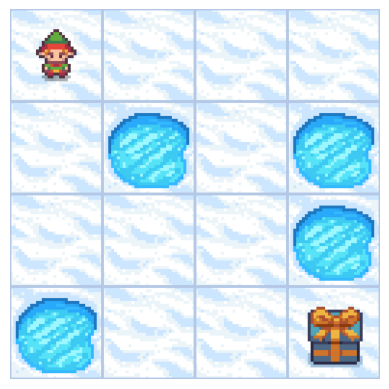

0
1 0 0.0 False {'prob': 0.3333333333333333}


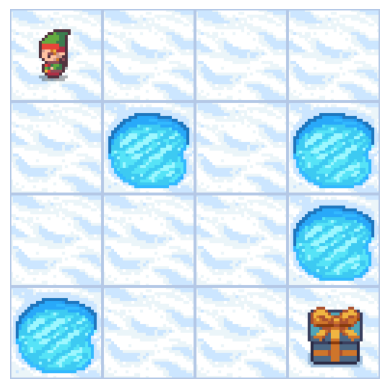

0
2 4 0.0 False {'prob': 0.3333333333333333}


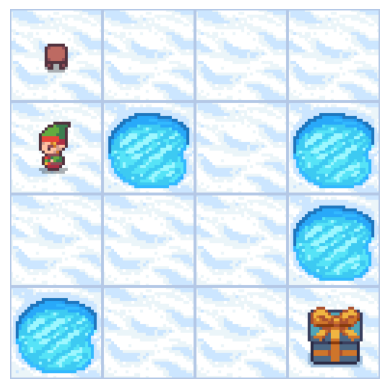

2
3 5 0.0 True {'prob': 0.3333333333333333, 'TimeLimit.truncated': False}


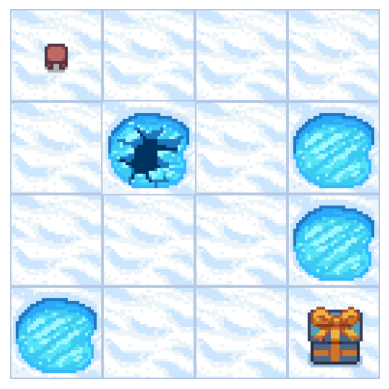

In [ ]:
# Ініціалізація середовища
observation = env.reset()

# Візуалізація середовища з режимом 'ansi'
show_render(env.render()[0])

# Взаємодія з середовищем
action = env.action_space.sample()  # Випадкова дія
print(action)
observation, reward, done, info = env.step(action)
print('1', observation, reward, done, info)

# Візуалізація знову
show_render(env.render()[0])

# Взаємодія з середовищем
action = env.action_space.sample()  # Випадкова дія
print(action)
observation, reward, done, info = env.step(action)
print('2', observation, reward, done, info)
# Візуалізація знову
show_render(env.render()[0])

# Взаємодія з середовищем
action = env.action_space.sample()  # Випадкова дія
print(action)
observation, reward, done, info = env.step(action)
print('3', observation, reward, done, info)
# Візуалізація знову
show_render(env.render()[0])

# # Закриття середовища
# env.close()


In [ ]:
env.reset()

0

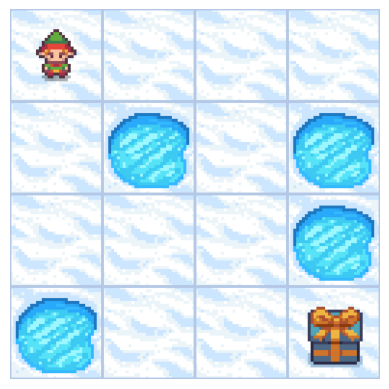

In [ ]:
show_render(env.render()[0])

0
4 12 0 True {'prob': 1.0, 'TimeLimit.truncated': False}


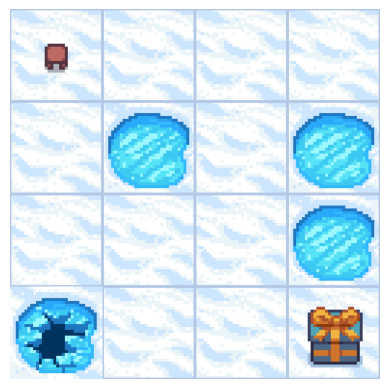

In [ ]:
action = 0  # Випадкова дія
print(action)
observation, reward, done, info = env.step(action)
print('4', observation, reward, done, info)
# Візуалізація знову
show_render(env.render()[0])

Почнемо з дослідження середовища. Кількість можливих станів у середовищі — 16 (сітка 4 × 4):

In [ ]:
print(env.observation_space.n)

16


Кількість дій у середовищі дорівнює 4 (вгору, вниз, ліворуч і праворуч).

In [ ]:
print(env.action_space.n)

4


In [ ]:
# Визначимо функцію value_iteration(), яка повертає оптимальну функцію цінності (таблицю цінності). Насамперед розберемося, як працює функція крок за кроком, а потім розглянемо весь код.
# Спочатку випадкова таблиця цінності ініціалізується 0 всім станів; також ініціалізується кількість ітерацій
value_table = np.zeros(env.observation_space.n)
no_of_iterations = 100000

In [ ]:
# На початку кожної ітерації value_table копіюється в updated_value_table:
for i in range(no_of_iterations):
       updated_value_table = np.copy(value_table)

In [ ]:
# Потім обчислюється Q-таблиця і з неї вибирається максимальна пара стан/дія, що має найбільшу цінність у таблиці.

# Замість створення Q-таблиці для кожного стану, ми створюємо список з ім'ям Q_value, а потім для кожної дії в стані створюється список next_states_rewards,
# в якому зберігається Q_value для наступного переходу. Потім значення next_state_rewards підсумовуються та приєднуються до Q_value.

# При обчисленні next_state_rewards для всіх дій у стані та приєднання результату до Q ми беремо максимальне значення Q та оновлюємо його як цінність стану.

for state in range(env.observation_space.n):
    Q_value = []
    for action in range(env.action_space.n):
        next_states_rewards = []
        for next_sr in env.P[state][action]:
            trans_prob, next_state, reward_prob, _ = next_sr
            next_states_rewards.append((trans_prob * (reward_prob + gamma * updated_value_table[next_state])))

        Q_value.append(np.sum(next_states_rewards))

    value_table[state] = max(Q_value)

In [ ]:
# Потім ми перевіряємо, чи було досягнуто збіжності, тобто дуже мала різниця між таблицею цінності та оновленою таблицею цінності.
# Для цього ми визначаємо змінну threshold, а потім перевіряємо, чи перевищує різницю цей поріг; якщо різниця менша, то цикл переривається, а функція цінності повертається як оптимальна функція цінності.

threshold = 1e-20
if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
    print ('Value-iteration converged at iteration# %d.' %(i+1))
    break


SyntaxError: 'break' outside loop (<ipython-input-133-73b23d833e4b>, line 7)

In [ ]:
def value_iteration(env, gamma = 1.0):

    # initialize value table with zeros
    value_table = np.zeros(env.observation_space.n)

    # set number of iterations and threshold
    no_of_iterations = 100000
    threshold = 1e-20

    for i in range(no_of_iterations):

        # On each iteration, copy the value table to the updated_value_table
        updated_value_table = np.copy(value_table)

        # Now we calculate Q Value for each actions in the state
        # and update the value of a state with maximum Q value

        for state in range(env.observation_space.n):
            Q_value = []
            for action in range(env.action_space.n):
                next_states_rewards = []
                for next_sr in env.P[state][action]:
                    trans_prob, next_state, reward_prob, _ = next_sr
                    next_states_rewards.append((trans_prob * (reward_prob + gamma * updated_value_table[next_state])))

                Q_value.append(np.sum(next_states_rewards))

            value_table[state] = max(Q_value)

        # we will check whether we have reached the convergence i.e whether the difference
        # between our value table and updated value table is very small. But how do we know it is very
        # small? We set some threshold and then we will see if the difference is less
        # than our threshold, if it is less, we break the loop and return the value function as optimal
        # value function

        if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
             print ('Value-iteration converged at iteration# %d.' %(i+1))
             break

    return value_table

In [ ]:
# Після того, як функцією optimal_value_function буде знайдено оптимальну функцію цінності, отримаємо з неї оптимальну політику.
# Для цього обчислюємо значення Q, використовуючи дію з оптимальною цінністю, і вибираємо дії, що мають найвище значення Q для кожного стану, формуючи оптимальну політику.
# Це завдання вирішується функцією extract_policy().
# Спочатку визначається випадкова політика; ми надамо їй значення 0 для всіх станів: policy = np.zeros(env.observation_space.n)
# Далі для кожного стану будується таблиця Q_table та для кожної дії в цьому стані обчислюється значення, яке додається Q_table:

for state in range(env.observation_space.n):

    # initialize the Q table for a state
    Q_table = np.zeros(env.action_space.n)

    # compute Q value for all ations in the state
    for action in range(env.action_space.n):
        for next_sr in env.P[state][action]:
            trans_prob, next_state, reward_prob, _ = next_sr
            Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))

In [ ]:
# Потім ми виберемо політику для стану як дію з найбільшим значенням Q: policy[state] = np.argmax(Q_table)

# Повний код функції extract_policy()



def extract_policy(value_table, gamma = 1.0):

    # initialize the policy with zeros
    policy = np.zeros(env.observation_space.n)


    for state in range(env.observation_space.n):

        # initialize the Q table for a state
        Q_table = np.zeros(env.action_space.n)

        # compute Q value for all ations in the state
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]:
                trans_prob, next_state, reward_prob, _ = next_sr
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))

        # select the action which has maximum Q value as an optimal action of the state
        policy[state] = np.argmax(Q_table)

    return policy

In [ ]:
# Таким чином, ми можемо обчислити optimal_value_function з використанням value_iteration:
optimal_value_function =value_iteration(env=env,gamma=1.0)

Value-iteration converged at iteration# 1373.


In [ ]:
# Після цього оптимальна політика optimal_policy обчислюється так:
optimal_policy = extract_policy(optimal_value_function, gamma=1.0)

In [ ]:
# В результаті ми отримуємо вивід — оптимальну політику, тобто дії, які потрібно виконувати в кожному стані:
print(optimal_value_function)
print(optimal_policy)

[0.82352941 0.82352941 0.82352941 0.82352941 0.82352941 0.
 0.52941176 0.         0.82352941 0.82352941 0.76470588 0.
 0.         0.88235294 0.94117647 0.        ]
[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


In [ ]:
# Ітерації за політиками

# Ітерація з політиками починається з ініціалізації випадкової політики. Потім оцінюються випадкові політики, які були ініціалізовані, наскільки вони хороші чи погані.
# Для визначення ступеня ефективності політик будемо обчислювати для випадково ініціалізованих політик функції цінності. Якщо результат виявиться поганим, потрібно шукати нову політику. Цей процес повторюється доти, доки знайдено хороша політика.

# Розглянемо далі розв'язання задачу про замерзле озеро за допомогою ітерації за політиками. Розглянемо, як обчислити функцію цінності для заданої політики.
# Таблиця value_table ініціалізується нулями за кількістю станів:
value_table = np.zeros(env.observation_space.n)

In [ ]:
# Потім для кожного стану з політики визначається дія та обчислюється функція цінності для цієї дії та стану:
updated_value_table = np.copy(value_table)

# for each state in the environment, select the action according to the policy and compute the value table
for state in range(env.observation_space.n):
    action = policy[state]

    # build the value table with the selected action
    value_table[state] = sum([trans_prob * (reward_prob + gamma * updated_value_table[next_state])
                for trans_prob, next_state, reward_prob, _ in env.P[state][action]])

NameError: name 'policy' is not defined

In [ ]:
# Ітерація завершується коли різниця між value_table та updated_value_table падає нижче ніж threshold:
threshold = 1e-10
if (np.sum((np.fabs(updated_value_table - value_table))) <= threshold):
    break

SyntaxError: 'break' outside loop (<ipython-input-152-4859dbee7b02>, line 4)

In [ ]:
# Ітерації за політиками виконуються у функції policy_iteration().
# Спочатку old_policy ініціалізується масивом NumPy із нулями, розмір якого відповідає кількості станів:

old_policy = np.zeros(env.observation_space.n)

In [ ]:
# Після цього для кожної ітерації обчислюється new_value_function у відповідності з випадковою політикою:
new_value_function = compute_value_function(old_policy, gamma)

In [ ]:
# Для визначення політики буде використовуватись значення new_value_function. Тут використовується та ж функція extract_policy(), що і в ітерації за цінністю:
new_policy = extract_policy(new_value_function, gamma)

In [ ]:
# Далі перевірка збіжності, для чого old_policy порівнюється з новою політикою new_policy. Якщо вони не відрізняються, то ітерація завершується. Інакше old_policy оновлюється new_policy:
if (np.all(random_policy == new_policy)):
    print ('Policy-Iteration converged at step
    %d.' %(i+1))
    break
old_policy = new_policy

# Додаткові матеріали

1. Markov model NLP покроково - https://colab.research.google.com/drive/1tt-AFcIemBEynTasmSk58H706Yfuq40C?usp=sharing
2. Q-learning for beginners - https://towardsdatascience.com/q-learning-for-beginners-2837b777741
3. Лінк на книжку з Grokking D RL: https://livebook.manning.com/book/grokking-deep-reinforcement-learning/chapter-2/1
4. GitHub по книжці: https://github.com/mimoralea/gdrl
5. Hidden Markov Models: The Secret Sauce in Natural Language Processing - https://medium.com/@ompramod9921/hidden-markov-models-the-secret-sauce-in-natural-language-processing-98cde0372721
6. Understanding the Differences in Language Models - Transformers vs. Markov Models - https://safjan.com/understanding-differences-gpt-transformers-markov-models/
7. Understanding Language Modeling: From N-grams to Transformer-based Neural Models - https://medium.com/@roshmitadey/understanding-language-modeling-from-n-grams-to-transformer-based-neural-models-d2bdf1532c6d
8.  Лінк на книжку з Grokking D RL: https://livebook.manning.com/book/grokking-deep-reinforcement-learning/chapter-2/1

